# Evaluación I Módulo 2 (sprint 1)
## Ejercicios de Pandas
---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.options.display.max_columns = None 

Para la parte de Pandas usaremos el mismo conjunto de datos de música de Spotify, en concreto tendremos un conjunto de datos de canciones de varios artistas en el mundo y para cada canción está presente:  
- Varias estadísticas de la versión musical en spotify, incluido el número de streams  
- Número de visualizaciones del vídeo musical oficial de la canción en youtube  

Las variables que tendremos en este dataframe son:  

Incluye 26 variables para cada una de las canciones recogidas de spotify. Estas variables se describen brevemente a continuación:    
- `Track`: nombre de la canción, tal y como aparece en la plataforma Spotify.
- `Artist`: nombre del artista.
- `Url_spotify`: Url de la canción.
- `Album`: el álbum en el que se encuentra la canción en Spotify.
- `Album_type`: indica si la canción se publica en Spotify como single o dentro de un álbum.
- `Uri`: un enlace de Spotify utilizado para encontrar la canción a través de la API.
- `Danceability`: describe lo adecuada que es una canción para bailar basándose en una combinación de elementos musicales como el tempo, la estabilidad del ritmo, la fuerza del compás y la regularidad general. Un valor de 0,0 es el menos bailable y 1,0 el más bailable.
- `Energy`: es una medida de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad. Normalmente, las pistas energéticas son rápidas, ruidosas y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. Las características perceptivas que contribuyen a este atributo incluyen el rango dinámico, el volumen percibido, el timbre, la velocidad de inicio y la entropía general.
- `Key`: la clave de la pista. Los números enteros se asignan a los tonos utilizando la notación estándar Pitch Class. Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detecta ninguna tonalidad, el valor es -1.
- `Loudness`: la sonoridad global de una pista en decibelios (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa de las pistas. La sonoridad es la cualidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores suelen oscilar entre -60 y 0 db.
- `Speechiness`: detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente hablada sea la grabación (por ejemplo, un programa de entrevistas, un audiolibro, poesía), más se acercará a 1,0 el valor del atributo. Los valores superiores a 0,66 describen pistas que probablemente estén compuestas en su totalidad por palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener tanto música como voz, ya sea en secciones o en capas, incluyendo casos como la música rap. Los valores por debajo de 0,33 representan probablemente música y otras pistas no habladas.
- `Acousticness`: una medida de confianza de 0,0 a 1,0 para determinar si la pista es acústica. 1,0 representa una confianza alta en que la pista es acústica.
- `Instrumentalness`: predice si una pista no contiene voces. Los sonidos "ooh" y "aah" se consideran instrumentales en este contexto. Las pistas de rap o spoken word son claramente "vocales". Cuanto más se acerque el valor de instrumental a 1,0, mayor será la probabilidad de que la canción no contenga voces. Los valores superiores a 0,5 representan pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1,0.
- `Liveness`: detecta la presencia de público en la grabación. Los valores más altos representan una mayor probabilidad de que la pista se haya interpretado en directo. Un valor superior a 0,8 proporciona una gran probabilidad de que la pista sea en directo.
- `Valence`: una medida de 0,0 a 1,0 que describe la positividad musical que transmite una pista. Las pistas con una valencia alta suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con una valencia baja suenan más negativas (por ejemplo, tristes, deprimidas, enfadadas).
- `Tempo`: el tempo global estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración media de los tiempos.
- `Duration_ms`: duración de la pista en milisegundos.
- `Stream`: número de streams de la canción en Spotify.
- `Url_youtube`: url del vídeo enlazado a la canción en Youtube, si lo tiene.
- `Title`: título del videoclip en Youtube.
- `Channel`: nombre del canal que ha publicado el vídeo.
- `Views`: número de vistas.
- `Likes`: número de me gusta.
- `Comments`: número de comentarios.
- `Description`: descripción del vídeo en Youtube.
- `Licensed`: Indica si el vídeo representa contenido con licencia, lo que significa que el contenido fue subido a un canal vinculado a un socio de contenido de Youtube y luego reclamado por dicho socio.
- `official_video`: valor booleano que indica si el vídeo encontrado es el vídeo oficial de la canción.  

Los ejercicios que os plantemos para esta parte de la evaluación son:

1. Importad Pandas

- Por convención se ha importado en la parte superior del notebook.

2. Exploración del conjunto de datos:  
- Cargad el fichero, al cargarlo os aparecerá una columna llamada "Unnamed: 0". Cargad el dataset sin que aparezca esta columna. Además realizad un análisis exploratorio que incluya:  
- Cuando leais el fichero, veremos que no podemos ver todas las columnas, utilizad el comando correcto para poder visualizarlas todas cuando hacemos un head  
- Primeras 5 filas del dataframe  
- Últimas 5 filas del dataframe  
- 10 filas aleatorias del dataframe  
- ¿Cuántas filas y columnas tenemos en el dataframe  
-¿Cuáles son los tipos de los datos de cada columna del dataframe  
- ¿Cuántos valores nulos tenemos por columna?  
- ¿Tenemos filas duplicadas en el dataframe ?  
- Muestra los principales estadísticos para las columnas numéricas del dataframe  
- Muestra los principales estadísticos para las columnas categóricas del dataframe  

In [2]:
# cargamos el fichero sin la columna "Unnamed: 0":
df = pd.read_csv('../datos/Spotify_Youtube.csv', index_col=0) 
df.head(1) # por convención se ha incluido la línea de código necesaria para poder visualizar todas las columnas en la parte de arriba del notebook

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,"0,818","0,705","6,0","-6,679","0,177","0,00836","0,00233",0.613,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


In [3]:
# creamos una función para realizar una primera exploración con la información solicitada y alguna extra que se condiera de utilidad de forma ordenada:
def explorar_df(dataframe, nombre = ''):
    """Esta función realiza la exploración inicial de un dataframe dado:
            - Muestra las 5 primeras filas
            - Muestra las 5 últimas filas
            - Muestra 10 filas aleatorias
            - Indica el nº de filas y columnas
            - Muestra el resultado del método .info()
            - Indica el número de nulos por columna en valor absoluto y porcentaje
            - Indica el nº de filas duplicadas
            - Muestra los principales estadísticos tanto de las columnas numéricas como de las categóricas
            - Muestra el nombre de las columnas
            - Indica el numero de valores distintos de cada columna y muestra los valores cuando sean 15 o menos          
        Parámetros:
            - dataframe (pandas.core.frame.DataFrame): dataframe que se requiere explorar
            - nombre (str): nombre del dataframe a explorar. Parámetro por defecto con valor '' para que si n o se le quiere poner un nombre al dataframe
              la exploración pueda continuar.
        Return: None.
        """
    print(f'EXPLORACIÓN DEL DATAFRAME {nombre.upper()}')
    print('---------------------------------------------------------------------------')
    print(f'Las primeras 5 filas del dataframe {nombre} son:')
    display(dataframe.head())
    print('---------------------------------------------------------------------------')
    print(f'Las últimas 5 filas del dataframe {nombre} son:')
    display(dataframe.tail())
    print('---------------------------------------------------------------------------')
    print(f'A comntinuación se muestran 10 filas aleatorias del dataframe {nombre}:')
    display(dataframe.sample(10))
    print('---------------------------------------------------------------------------')
    print(f'El dataframe {nombre} tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas')
    print('---------------------------------------------------------------------------')
    print('A continuación el resultado del método .info() incluyendo los tipos de dato de cada columna:')
    dataframe.info()
    print('---------------------------------------------------------------------------')
    print("El número de nulos por columna en valor absoluto y porcentaje es:")
    for i, col in enumerate(dataframe.isnull().sum()):
        print(f"{dataframe.isnull().sum().index[i]}: nº de nulos: {col}. % de nulos: {round(col/dataframe.shape[0]*100, 2)} %")
    print('---------------------------------------------------------------------------')
    print(f'El nº de filas duplicadas del dataframe {nombre} es: {df.duplicated().sum()}')
    print('---------------------------------------------------------------------------')
    print(f'Los principales estadísticos de las columnas numéricas son:')
    display(dataframe.describe())
    print('---------------------------------------------------------------------------')
    print(f'Los principales estadísticos de las columnas categóricas son:')
    display(dataframe.describe(include=object))
    print('---------------------------------------------------------------------------')
    print(f"El dataframe {nombre} tiene las siguientes columnas: \n{dataframe.columns}")
    print('---------------------------------------------------------------------------')
    print("El numero de valores distintos de cada columna es:")
    for col in dataframe.columns:
        if len(dataframe[col].value_counts()) > 15:
            print(f'{col}: {len(dataframe[col].value_counts())}')
        else:
            print(f'{col}: {len(dataframe[col].value_counts())}')
            print(f"Los valores únicos de la columna '{col}' son: {dataframe[col].unique()}")

In [4]:
# introducimos a la función los dos parámetros requeridos
explorar_df(df, 'Spotify-Youtube') # el nombre no es indispensable, ya que en ausencia del mismo el valor por defecto permite que la función no falle

EXPLORACIÓN DEL DATAFRAME SPOTIFY-YOUTUBE
---------------------------------------------------------------------------
Las primeras 5 filas del dataframe Spotify-Youtube son:


,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,"0,818","0,705","6,0","-6,679","0,177","0,00836","0,00233",0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,"0,676","0,703","8,0","-5,815","0,0302","0,0869","0,000687",0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,"0,695","0,923","1,0","-3,93","0,0522","0,0425","0,0469",0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,"0,689","0,739","2,0","-5,81","0,026","1,51e-05","0,509",0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,"0,663","0,694","10,0","-8,627","0,171","0,0253","0,0",0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


---------------------------------------------------------------------------
Las últimas 5 filas del dataframe Spotify-Youtube son:


,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,"0,582","0,926","5,0","-6,344","0,0328","0,448","0,0",0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9227144.0
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,"0,531","0,936","4,0","-1,786","0,137","0,028","0,0",0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,10898176.0
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,"0,443","0,83","4,0","-4,679","0,0647","0,0243","0,0",0.1540,0.4190,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6226110.0
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,"0,417","0,767","9,0","-4,004","0,419","0,356","0,0184",0.1080,0.5390,155.378,108387.0,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6873961.0
20717,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,MISS YOU HARDSTYLE,MISS YOU HARDSTYLE,single,spotify:track:6lOn0jz1QpjcWeXo1oMm0k,"0,498","0,938","6,0","-4,543","0,107","0,00277","0,911",0.1360,0.0787,160.067,181500.0,https://www.youtube.com/watch?v=zau0dckCFi0,MISS YOU HARDSTYLE,SICK LEGEND - Topic,158697.0,2484.0,0.0,Provided to YouTube by Routenote\n\nMISS YOU H...,True,True,5695584.0


---------------------------------------------------------------------------
A comntinuación se muestran 10 filas aleatorias del dataframe Spotify-Youtube:


,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,Official_video,Stream
5767,Jadakiss,https://open.spotify.com/artist/5pnbUBPifNnlus...,Pa Que Sude (Gonna Make You Sweat/Chosen Few M...,Pa Que Sude (Gonna Make You Sweat/Chosen Few M...,single,spotify:track:64znnDhgrJjbxQK7dsEe3Q,"0,903","0,798","1,0","-2,806","0,153","0,0273","0,00131",0.4530,0.661,100.482,180680.0,https://www.youtube.com/watch?v=A4jB-SJEj74,"Jon Z, Jadakiss, Shootter Ledo, Boy Wonder- Pa...",Chosen Few,1146614.0,2934.0,67.0,Jon Z & Jadakiss - Pa Que Sude / Gonna Make Yo...,False,False,2232124.0
13406,Peter Groeger,https://open.spotify.com/artist/5zKi7YSU881kIG...,Kapitel 2.4 - Der Kaiser von Dallas,Der Kaiser von Dallas (Die einzige Wahrheit üb...,album,spotify:track:7jUAUke1KoxheXUSSfJINl,"0,689","0,278","8,0","-20,099","0,896","0,709","0,0",0.1230,0.819,118.531,189700.0,https://www.youtube.com/watch?v=vE-KJJoy7WI,Kapitel 2.4,Benjamin Quabeck - Topic,8.0,0.0,0.0,Provided to YouTube by Kontor New Media GmbH\n...,True,True,NaN
4497,Jamiroquai,https://open.spotify.com/artist/6J7biCazzYhU3g...,Seven Days in Sunny June,Dynamite,album,spotify:track:2bwxqGKS5GPXfNanAIRe2p,"0,707","0,797","7,0","-7,143","0,0435","0,2","0,0",0.3020,0.633,105.395,237867.0,https://www.youtube.com/watch?v=FRSH-egVyzk,Jamiroquai - Seven Days In Sunny June,JamiroquaiVEVO,37851192.0,143870.0,6628.0,Jamiroquai's official music video for 'Seven D...,True,True,62482268.0
3507,Genesis,https://open.spotify.com/artist/3CkvROUTQ6nRi9...,Follow You Follow Me - 2007 Remaster,And Then There Were Three (2007 Remaster),album,spotify:track:6gyU6PaPpzTCUYzZcVICwk,"0,386","0,7","7,0","-10,816","0,0412","0,154","0,0881",0.0870,0.769,185.777,239333.0,https://www.youtube.com/watch?v=DyDRXbP1MaY,Genesis - Follow You Follow Me (Official Music...,GenesisVEVO,15797157.0,89201.0,4420.0,Explore more music from Genesis here https://G...,True,True,NaN
12582,Jonas Brothers,https://open.spotify.com/artist/7gOdHgIoIKoe4i...,What A Man Gotta Do,What A Man Gotta Do,single,spotify:track:4wNIkl5XGiAACjFBlDWuSd,"0,852","0,698","9,0","-7,206","0,0629","0,00839","1,03e-06",0.0773,0.324,113.039,180645.0,https://www.youtube.com/watch?v=XejVB_fba04,Jonas Brothers - What A Man Gotta Do (Official...,JonasBrothersVEVO,118361100.0,1577360.0,33515.0,Official music video by Jonas Brothers perform...,True,True,437295470.0
6532,"Grover Washington, Jr.",https://open.spotify.com/artist/05YVYeV4HxYp5r...,Just the Two of Us,Winelight,album,spotify:track:5fdNHVZHbWB1AaXk4RBGVD,"0,743","0,429","10,0","-14,576","0,0902","0,447","0,362",0.0455,0.597,95.406,443773.0,https://www.youtube.com/watch?v=Uw5OLnN7UvM,Bill Withers - Just The Two Of Us (official v...,Pop music crooners of the 20th century,19097577.0,523793.0,9423.0,"William Harrison ""Bill"" Withers, Jr. (born Jul...",False,False,117651967.0
14920,Karsten Glück,https://open.spotify.com/artist/5Asmk7uzCjVJN7...,"Schlaf, Kindlein, schlaf",Die 30 besten Schlaflieder für Kinder,album,spotify:track:61l5QGkXo7bXB35IDCamg0,"0,616","0,291","0,0","-9,206","0,0363","0,834","9,05e-05",0.1070,0.155,97.676,106713.0,https://www.youtube.com/watch?v=b6K3a_ug9JE,"Schlaf, Kindlein, schlaf - Schlaflieder zum Mi...",Sing mit mir - Kinderlieder,6875371.0,17930.0,0.0,"Schlaf, Kindlein, schlaf - das klassische Wieg...",True,True,18992188.0
14773,La Adictiva,https://open.spotify.com/artist/49EE6lVLgU8sp7...,Disfruté Engañarte,Disfruté Engañarte,album,spotify:track:2yHmyqLvinMYOiOsJagAYK,"0,934","0,553","0,0","-3,214","0,0507","0,61","4,42e-05",0.0539,0.963,125.011,141560.0,https://www.youtube.com/watch?v=veGSJvm7zRM,La Adictiva Banda San José de Mesillas - Disfr...,laadictivaVEVO,1937240.0,16398.0,216.0,"""Disfruté Engañarte"" La Adictiva Banda San Jos...",True,True,90219915.0
2210,Busta Rhymes,https://open.spotify.com/artist/1YfEcTuGvBQ8x

---------------------------------------------------------------------------
El dataframe Spotify-Youtube tiene 20718 filas y 27 columnas
---------------------------------------------------------------------------
A continuación el resultado del método .info() incluyendo los tipos de dato de cada columna:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  object 
 7   Energy            20716 non-null  object 
 8   Key               20716 non-null  object 
 9   Loudness          20716 non-null  object 
 10  Speechiness     

,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


---------------------------------------------------------------------------
Los principales estadísticos de las columnas categóricas son:


,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Url_youtube,Title,Channel,Description,Licensed,Official_video
count,20718,20718,20718,20718,20718,20718,20716,20716,20716,20716,20716,20716,20716,20248,20248,20248,19842,20248,20248
unique,2079,2079,17841,11937,3,18862,898,1268,12,9417,1303,3138,4012,18154,18146,6714,17395,2,2
top,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,El Ultimo Adiós - Varios Artistas Version,Greatest Hits,album,spotify:track:0tzixmHNQfE6S6SirSToxW,"0,687","0,572","0,0","-7,818","0,0324","0,114","0,0",https://www.youtube.com/watch?v=GqOvxbFLwjY,Color Esperanza 2020 - Various Artists (Offici...,T-Series,,True,True
freq,10,10,24,30,14926,24,78,60,2305,25,72,50,9391,18,18,238,114,14140,15723


---------------------------------------------------------------------------
El dataframe Spotify-Youtube tiene las siguientes columnas: 
Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'Official_video', 'Stream'],
      dtype='object')
---------------------------------------------------------------------------
El numero de valores distintos de cada columna es:
Artist: 2079
Url_spotify: 2079
Track: 17841
Album: 11937
Album_type: 3
Los valores únicos de la columna 'Album_type' son: ['album' 'single' 'compilation']
Uri: 18862
Danceability: 898
Energy: 1268
Key: 12
Los valores únicos de la columna 'Key' son: ['6,0' '8,0' '1,0' '2,0' '10,0' '11,0' '4,0' '9,0' '0,0' '7,0' '5,0' '3,0'
 nan]
Loudness: 9417
Speech

3. Preparación de los datos:  
- Los nombres de las columnas empiezan con mayúsculas, poned todos los nombres de las columnas en minúsculas.  

In [5]:
# para no modificar el dataframe original hacemos una copia para realizar sobre ella la limpìeza
df2 = df.copy()
df2.rename(columns = {col: col.lower() for col in df.columns}, inplace=True)
df2.head(1)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,"0,818","0,705","6,0","-6,679","0,177","0,00836","0,00233",0.613,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


- Haciendo el análisis exploratorio nos deberíamos haber dado cuenta de que algunas de las variables (`danceability`, `energy`, `key`, `loudness`, `speechiness`, `acousticness`, `instrumentalness`) no son del tipo que deberían. Esto es debido a que los decimales están establecidos como comas y no con puntos. Cread una función que nos permita cambiar esas comas por puntos para que los datos tengan el tipo correcto.  
    - Después de haber hecho los cambios, chequead los tipos de datos. ¿Son ya del tipo correcto? En caso de que no, cread otra función o modificar la anterior para que sean de tipo float.    

In [6]:
# recordamos los nombres de las columnas
df2.columns

Index(['artist', 'url_spotify', 'track', 'album', 'album_type', 'uri',
       'danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'url_youtube', 'title', 'channel', 'views', 'likes',
       'comments', 'description', 'licensed', 'official_video', 'stream'],
      dtype='object')

In [7]:
# iteramos por las columnas que nos interesan con el método .apply()
for columna in df2.columns[6:13]:
    df2[columna] = df2[columna].apply(lambda dato: float(dato.replace(',', '.')) if type(dato) == str else dato) # si no aplicamos el float() no cambia el tipo de dato

# comprobamos en una muestra que los cambios de ',' por '.' se han realizado correctamente
df2.sample()

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
8431,Annie Lennox,https://open.spotify.com/artist/5MspMQqdVbdwP6...,Why,Diva,album,spotify:track:2fYYmPNwDaNpw1KRSxpQ5H,0.532,0.471,0.0,-9.27,0.0237,0.281,0.000061,0.134,0.12,90.936,293838.0,https://www.youtube.com/watch?v=HG7I4oniOyA,Annie Lennox - Why (Official Music Video),AnnieLennoxVEVO,70949569.0,381569.0,18930.0,Annie Lennox - Why (Official Video)\nListen on...,True,True,83478300.0


In [8]:
# comprobamos que los cambios de tipo de dato se han realizado correctamente
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            20718 non-null  object 
 1   url_spotify       20718 non-null  object 
 2   track             20718 non-null  object 
 3   album             20718 non-null  object 
 4   album_type        20718 non-null  object 
 5   uri               20718 non-null  object 
 6   danceability      20716 non-null  float64
 7   energy            20716 non-null  float64
 8   key               20716 non-null  float64
 9   loudness          20716 non-null  float64
 10  speechiness       20716 non-null  float64
 11  acousticness      20716 non-null  float64
 12  instrumentalness  20716 non-null  float64
 13  liveness          20716 non-null  float64
 14  valence           20716 non-null  float64
 15  tempo             20716 non-null  float64
 16  duration_ms       20716 non-null  float6

- Hay algunas canciones cuyo título está en mayúsulas. Crea una función para que todos los títulos estén en minúscula. Haced lo mismo para las columnas de "artist" y "album".  

In [9]:
# iteramos por las columnas que nos interesan con el método .apply()
col_minus = [df2.columns[0], df2.columns[2], df2.columns[3]] # creamos una lista con las columnas en las que queremos aplicar la función
for i in col_minus: # itermos por la lista de columnas aplicando la función en cada una de ellas
    df2[i] = df2[i].apply(lambda mayus: mayus.lower() if type(mayus) == str else mayus)

# comprobamos las últimas filas que en la exploración inicial se veía que estaban en mayúsculas
df2.tail()


,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
20713,sick legend,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,just dance hardstyle,just dance hardstyle,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.44800,0.0000,0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9227144.0
20714,sick legend,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,set fire to the rain hardstyle,set fire to the rain hardstyle,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.02800,0.0000,0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,10898176.0
20715,sick legend,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,outside hardstyle sped up,outside hardstyle sped up,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.02430,0.0000,0.1540,0.4190,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6226110.0
20716,sick legend,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,only girl hardstyle,only girl hardstyle,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,0.4190,0.35600,0.0184,0.1080,0.5390,155.378,108387.0,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6873961.0
20717,sick legend,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,miss you hardstyle,miss you hardstyle,single,spotify:track:6lOn0jz1QpjcWeXo1oMm0k,0.498,0.938,6.0,-4.543,0.1070,0.00277,0.9110,0.1360,0.0787,160.067,181500.0,https://www.youtube.com/watch?v=zau0dckCFi0,MISS YOU HARDSTYLE,SICK LEGEND - Topic,158697.0,2484.0,0.0,Provided to YouTube by Routenote\n\nMISS YOU H...,True,True,5695584.0


- Algunos de los artistas tienen símbolos raros, en concreto el símbolo `$`. Cread una función que nos elimine este símbolo de los nombres de los artistas.

In [10]:
# en primer lugar vamos a ver qué artistas tenemos con el $
lista_dolar = []
for artista in df2['artist']:
    if '$' in artista:
        lista_dolar.append(artista)
set_dolar = set(lista_dolar)
set_dolar

{'$not',
 '$uicideboy$',
 'a$ap ferg',
 'a$ap rocky',
 'bbno$',
 'curren$y',
 'joey bada$$',
 'too $hort',
 'ty dolla $ign'}

In [11]:
# revisando los artistas con el símbolo del dolar se aprecia que en todos los casos salvo 1 son artistas cuyo nombre se suele pronunciar con una 's' en lugar del símbolo '$'
# la excepción es 'bbno$' que se pronuncia como 'baby no money'
# por lo tanto en lugar de eliminar el símbolo '$' directamente lo que hacemos es sustituirlo por 's', salvo en el caso de 'bbno$' que lo sustituiremos por 'baby no money' para no perder información
# por ello realizamos el cambio en dos pasos para cambiar primero la excepción
df2['artist'] = df2['artist'].apply(lambda dolar: dolar.replace('bbno$', 'baby no money') if 'bbno$' in dolar else dolar)
# hacemos un filtro para comprobar que el cambio se ha realizado correctamente
df2[df2['artist'] == 'baby no money'].sample()


,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
18922,baby no money,https://open.spotify.com/artist/41X1TR6hrK8Q2Z...,welcome to chilis,baby gravy 2,album,spotify:track:3PdcxgzpWzAsUGgkmykIFc,0.839,0.454,10.0,-9.09,0.157,0.359,0.0,0.0755,0.804,159.987,157500.0,https://www.youtube.com/watch?v=mpHvHGMZ0jc,Yung Gravy & bbno$ - Welcome to Chilis prod. Y...,Yung Gravy,20207057.0,435248.0,8629.0,Yung Gravy & bbno$ - Welcome to Chilis prod. Y...,False,True,119423321.0


In [12]:
# hacemos el cambio del resto
df2['artist'] = df2['artist'].apply(lambda dolar: dolar.replace('$', 's') if '$' in dolar else dolar)
# hacemos un filtro con uno de los artistas afectados y sacamos una línea de muestra para comprobar que el cambio se ha realizado correctamente
df2[df2['artist'] == 'snot'].sample()

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
19520,snot,https://open.spotify.com/artist/5IbEL2xjRtKsun...,like me (feat. iann dior),beautiful havoc,album,spotify:track:706ZrLifsm0nwlucKr4kQg,0.902,0.462,7.0,-7.945,0.0979,0.19,0.000002,0.094,0.646,103.984,167147.0,https://www.youtube.com/watch?v=SA9binN4wJs,$NOT - Like Me (feat. iann dior) [Official Video],SNOT,15803517.0,351375.0,11511.0,"The official video for $NOT's ""Like Me"" featur...",True,True,78913057.0


4. Filtrado de datos y Visualización:  
- ¿Cuáles son los valores únicos de la columna "album_type"? Cread tres dataframes diferentes, uno para cada tipo de "album_type". ¿Cuántas canciones tenemos en cada tipo?

In [13]:
# aunque en la exploración inicial ya se sacaron se recuendan aquí los valores únicos
df2['album_type'].unique()

array(['album', 'single', 'compilation'], dtype=object)

In [14]:
# obtenemos el dataframe de tipo 'album':
df_album = df2[df2['album_type'] == 'album']
# comprobamos que es correcto
df_album['album_type'].unique()

array(['album'], dtype=object)

In [15]:
# obtenemos el dataframe de tipo 'single':
df_single = df2[df2['album_type'] == 'single']
# comprobamos que es correcto
df_single['album_type'].unique()

array(['single'], dtype=object)

In [16]:
# obtenemos el dataframe de tipo 'compilation':
df_compilation = df2[df2['album_type'] == 'compilation']
# comprobamos que es correcto
df_compilation['album_type'].unique()

array(['compilation'], dtype=object)

In [17]:
print(f'Hay {df_album.shape[0]} canciones de tipo "album"')
print(f'Hay {df_single.shape[0]} canciones de tipo "single"')
print(f'Hay {df_compilation.shape[0]} canciones de tipo "compilation"')
print(f'La suma de las 3 es el total de canciones del dataframe completo: {df_album.shape[0] + df_single.shape[0] + df_compilation.shape[0] == df2.shape[0]}')

Hay 14926 canciones de tipo "album"
Hay 5004 canciones de tipo "single"
Hay 788 canciones de tipo "compilation"
La suma de las 3 es el total de canciones del dataframe completo: True


- Usando el dataframe de los albumes que hemos creado en el ejercicio anterior. ¿Cuál es la media y la desviación estándar de "danceability", "acousticness" y "speechiness" de cada artista?. Mostrad los resultados en tres dataframes diferentes, uno para cada métrica ("danceability", "acousticness" y "speechiness"). Ordenar los resultados de mayor a menor en base a la media.

In [18]:
# iteramos para obtener todos los dataframes solicitados
df_dicc = {'df_tipo_album': df_album, 'df_tipo_single': df_single, 'df_tipo_compilation': df_compilation} # creamos un diccionario con los dataframes
metricas = ['danceability', 'acousticness', 'speechiness'] # creamos una lista con las métricas a analizar
df_resultado = {}
for key, value in df_dicc.items():
        for i in metricas:
                res = value.groupby('artist')[i].agg(media=('mean'), desviacion_estandar=('std')).sort_values(by='media', ascending=False) # obtenemos la media y desviación estándar para cada combinación de dataframe (agrupado por artista) y métrica
                df_resultado[f'{key}_{i}'] = res # almacenamos los dataframes resultado en un diccionario para que se pueda acceder a ellos de forma intuitiva a través de la key que menciona el tipo de album y la métrica 
df_resultado.keys() # printeamos las keys del diccionario resultado para poder utilizarlas para acceder a los dataframes

dict_keys(['df_tipo_album_danceability', 'df_tipo_album_acousticness', 'df_tipo_album_speechiness', 'df_tipo_single_danceability', 'df_tipo_single_acousticness', 'df_tipo_single_speechiness', 'df_tipo_compilation_danceability', 'df_tipo_compilation_acousticness', 'df_tipo_compilation_speechiness'])

In [19]:
# hacemos un par de comprobaciones para  ver que los resultados son los esperados
# muestra (5 primeras filas) del dataframe obtenido con el for loop
df_resultado['df_tipo_album_danceability'].head()

,media,desviacion_estandar
artist,,
latto,0.922333,0.014503
murda,0.911500,0.030406
jon z,0.886000,0.015556
blueface,0.885000,0.043782
jung kook,0.881000,NaN


In [20]:
# muestra (5 primeras filas) del dataframe obtenido por separado para el mismo caso para comprobar que es igual
df_album_danc = df_album.groupby('artist')['danceability'].agg(media=('mean'), desviacion_estandar=('std')).sort_values(by='media', ascending=False) 
df_album_danc.head() 


,media,desviacion_estandar
artist,,
latto,0.922333,0.014503
murda,0.911500,0.030406
jon z,0.886000,0.015556
blueface,0.885000,0.043782
jung kook,0.881000,NaN


In [21]:
df_album_danc3 = df_album.groupby('artist')['danceability'].agg(['mean','std']).sort_values(by='mean', ascending=False) 
df_album_danc3.head() 

,mean,std
artist,,
latto,0.922333,0.014503
murda,0.911500,0.030406
jon z,0.886000,0.015556
blueface,0.885000,0.043782
jung kook,0.881000,NaN


In [22]:
# muestra (5 primeras filas) del dataframe obtenido con el for loop
df_resultado['df_tipo_single_speechiness'].head() 

,media,desviacion_estandar
artist,,
d.o.e.,0.7010,NaN
blueface,0.5885,0.419314
d-block europe,0.5280,NaN
tego calderón,0.5160,NaN
divine,0.4510,NaN


In [23]:
# muestra (5 primeras filas) del dataframe obtenido por separado para el mismo caso para comprobar que es igual
df_album_danc = df_single.groupby('artist')['speechiness'].agg(media=('mean'), desviacion_estandar=('std')).sort_values(by='media', ascending=False) 
df_album_danc.head()


,media,desviacion_estandar
artist,,
d.o.e.,0.7010,NaN
blueface,0.5885,0.419314
d-block europe,0.5280,NaN
tego calderón,0.5160,NaN
divine,0.4510,NaN


In [24]:
# Como muestra imprimimos las primeras 5 líneas de cada dataframe
for k,v in df_resultado.items():
    print('A continuación se presentan los dataframes solicitados con la media y desviación estándar de distintas métricas para los diferentes tipos de album:')
    print(f'Las 5 primeras filas del dataframe {k} son las siguientes:')
    display(v.head())

A continuación se presentan los dataframes solicitados con la media y desviación estándar de distintas métricas para los diferentes tipos de album:
Las 5 primeras filas del dataframe df_tipo_album_danceability son las siguientes:


,media,desviacion_estandar
artist,,
latto,0.922333,0.014503
murda,0.911500,0.030406
jon z,0.886000,0.015556
blueface,0.885000,0.043782
jung kook,0.881000,NaN


A continuación se presentan los dataframes solicitados con la media y desviación estándar de distintas métricas para los diferentes tipos de album:
Las 5 primeras filas del dataframe df_tipo_album_acousticness son las siguientes:


,media,desviacion_estandar
artist,,
claude debussy,0.993714,0.001380
robert schumann,0.993444,0.004902
franz schubert,0.989500,0.005237
edvard grieg,0.989500,0.007863
frédéric chopin,0.989286,0.004071


A continuación se presentan los dataframes solicitados con la media y desviación estándar de distintas métricas para los diferentes tipos de album:
Las 5 primeras filas del dataframe df_tipo_album_speechiness son las siguientes:


,media,desviacion_estandar
artist,,
sir arthur conan doyle,0.9523,0.008845
bibi blocksberg,0.9453,0.011879
sherlock holmes,0.9393,0.015833
tkkg,0.9193,0.023542
fünf freunde,0.9062,0.048960


A continuación se presentan los dataframes solicitados con la media y desviación estándar de distintas métricas para los diferentes tipos de album:
Las 5 primeras filas del dataframe df_tipo_single_danceability son las siguientes:


,media,desviacion_estandar
artist,,
the game,0.934,NaN
el alfa,0.925,NaN
peter fox,0.911,0.011314
n.w.a.,0.905,NaN
kelis,0.903,NaN


A continuación se presentan los dataframes solicitados con la media y desviación estándar de distintas métricas para los diferentes tipos de album:
Las 5 primeras filas del dataframe df_tipo_single_acousticness son las siguientes:


,media,desviacion_estandar
artist,,
johannes brahms,0.9950,NaN
yiruma,0.9930,0.001414
franz liszt,0.9930,NaN
claude debussy,0.9925,0.000707
camille saint-saëns,0.9920,NaN


A continuación se presentan los dataframes solicitados con la media y desviación estándar de distintas métricas para los diferentes tipos de album:
Las 5 primeras filas del dataframe df_tipo_single_speechiness son las siguientes:


,media,desviacion_estandar
artist,,
d.o.e.,0.7010,NaN
blueface,0.5885,0.419314
d-block europe,0.5280,NaN
tego calderón,0.5160,NaN
divine,0.4510,NaN


A continuación se presentan los dataframes solicitados con la media y desviación estándar de distintas métricas para los diferentes tipos de album:
Las 5 primeras filas del dataframe df_tipo_compilation_danceability son las siguientes:


,media,desviacion_estandar
artist,,
nate dogg,0.945000,NaN
ice cube,0.934000,NaN
shaggy,0.929000,NaN
ronnie flex,0.900667,0.055012
twista,0.900000,NaN


A continuación se presentan los dataframes solicitados con la media y desviación estándar de distintas métricas para los diferentes tipos de album:
Las 5 primeras filas del dataframe df_tipo_compilation_acousticness son las siguientes:


,media,desviacion_estandar
artist,,
claude debussy,0.9950,NaN
george frideric handel,0.9950,NaN
erik satie,0.9950,NaN
traditional,0.9925,0.002121
ludwig van beethoven,0.9925,0.002121


A continuación se presentan los dataframes solicitados con la media y desviación estándar de distintas métricas para los diferentes tipos de album:
Las 5 primeras filas del dataframe df_tipo_compilation_speechiness son las siguientes:


,media,desviacion_estandar
artist,,
cypress hill,0.494,NaN
aitch,0.477,NaN
tion wayne,0.477,NaN
mos def,0.439,0.005657
ghostface killah,0.434,NaN


- Se quiere estudiar si existe una relación entre la cantidad de visitas que reciben los videos de música de un artista en una plataforma de streaming y la cantidad de likes que estos videos obtienen. Por lo tanto, querremos contestar a la siguiente pregunta: ¿Son aquellos artistas que tienen más visitas los que más likes tienen? Para solucionar este ejercicio deberéis:
    - Agrupar por artista y calcular la media de visitas y de likes.
    - Quedaros con los 10 artistas que más visitas han tenido.
    - Quedaros con los 10 artistas que más likes han tenido.
    - Haced un subplot, donde en uno tengamos los 10 artistas con más likes y en el otro los 10 artistas con mas views.

In [25]:
# agupamos por artista y calculamos la media de visitas y likes
df_views_likes = df2.groupby('artist')[['views', 'likes']].mean().reset_index()
df_views_likes.head()

,artist,views,likes
0,(g)i-dle,175495394.1,2446296.3
1,*nsync,102783286.2,423342.3
2,070 shake,9609935.9,201300.5
3,112,21913445.9,150914.1
4,11:11 music group,1267282.4,17970.1


In [26]:
# los 10 que más visitas han tenido
df_10views = df_views_likes.sort_values(by='views', ascending=False).head(10)
df_10views

,artist,views,likes
535,ed sheeran,1.546021e+09,8354331.9
380,cocomelon,1.460167e+09,4171391.3
965,katy perry,1.312063e+09,6306709.0
338,charlie puth,1.216759e+09,8633692.5
1165,luis fonsi,1.162811e+09,6690848.9
941,justin bieber,1.099106e+09,7858434.8
420,daddy yankee,1.087193e+09,6551817.1
272,bruno mars,1.024092e+09,5961614.6
1190,macklemore & ryan lewis,1.012206e+09,6604141.0
387,coldplay,9.997278e+08,6315789.5


In [27]:
# extraemos los artistas
arr10views = np.array(df_10views['artist'])
print(f'Los artistas que están en el top10 de más visionados son: \n{arr10views}')

Los artistas que están en el top10 de más visionados son: 
['ed sheeran' 'cocomelon' 'katy perry' 'charlie puth' 'luis fonsi'
 'justin bieber' 'daddy yankee' 'bruno mars' 'macklemore & ryan lewis'
 'coldplay']


In [28]:
# los 10 que más likes han tenido
df_10likes = df_views_likes.sort_values(by='likes', ascending=False).head(10)
df_10likes

,artist,views,likes
277,bts,5.607867e+08,13940380.8
218,blackpink,9.392962e+08,13230250.5
338,charlie puth,1.216759e+09,8633692.5
535,ed sheeran,1.546021e+09,8354331.9
941,justin bieber,1.099106e+09,7858434.8
202,billie eilish,4.821569e+08,7333853.7
785,imagine dragons,9.093785e+08,7227447.7
51,alan walker,7.256847e+08,6797770.2
500,dj snake,9.180268e+08,6777583.1
1165,luis fonsi,1.162811e+09,6690848.9


In [29]:
# extraemos los artistas
arr10likes = np.array(df_10likes['artist'])
print(f'Los artistas que están en el top10 de más likes son: \n{arr10likes}')

Los artistas que están en el top10 de más likes son: 
['bts' 'blackpink' 'charlie puth' 'ed sheeran' 'justin bieber'
 'billie eilish' 'imagine dragons' 'alan walker' 'dj snake' 'luis fonsi']


In [30]:
# sacamos los comunes a ambas listas (los que están en el top10 de visitas y likes)
arr_comunes = np.intersect1d(arr10views, arr10likes) 
print(f'Los artistas que están en el top10 de ambas listas son: \n{arr_comunes}')

Los artistas que están en el top10 de ambas listas son: 
['charlie puth' 'ed sheeran' 'justin bieber' 'luis fonsi']


- Tan solo 5 artistas están en ambas listas, por lo que no siempre los artistas con más visisionados son los que tienen más likes aunque sí hay una muy alta coincidencia si tenemos en cuenta que en la exploración inicial vimos que había 2079 valores únicos en la columna 'artista' 

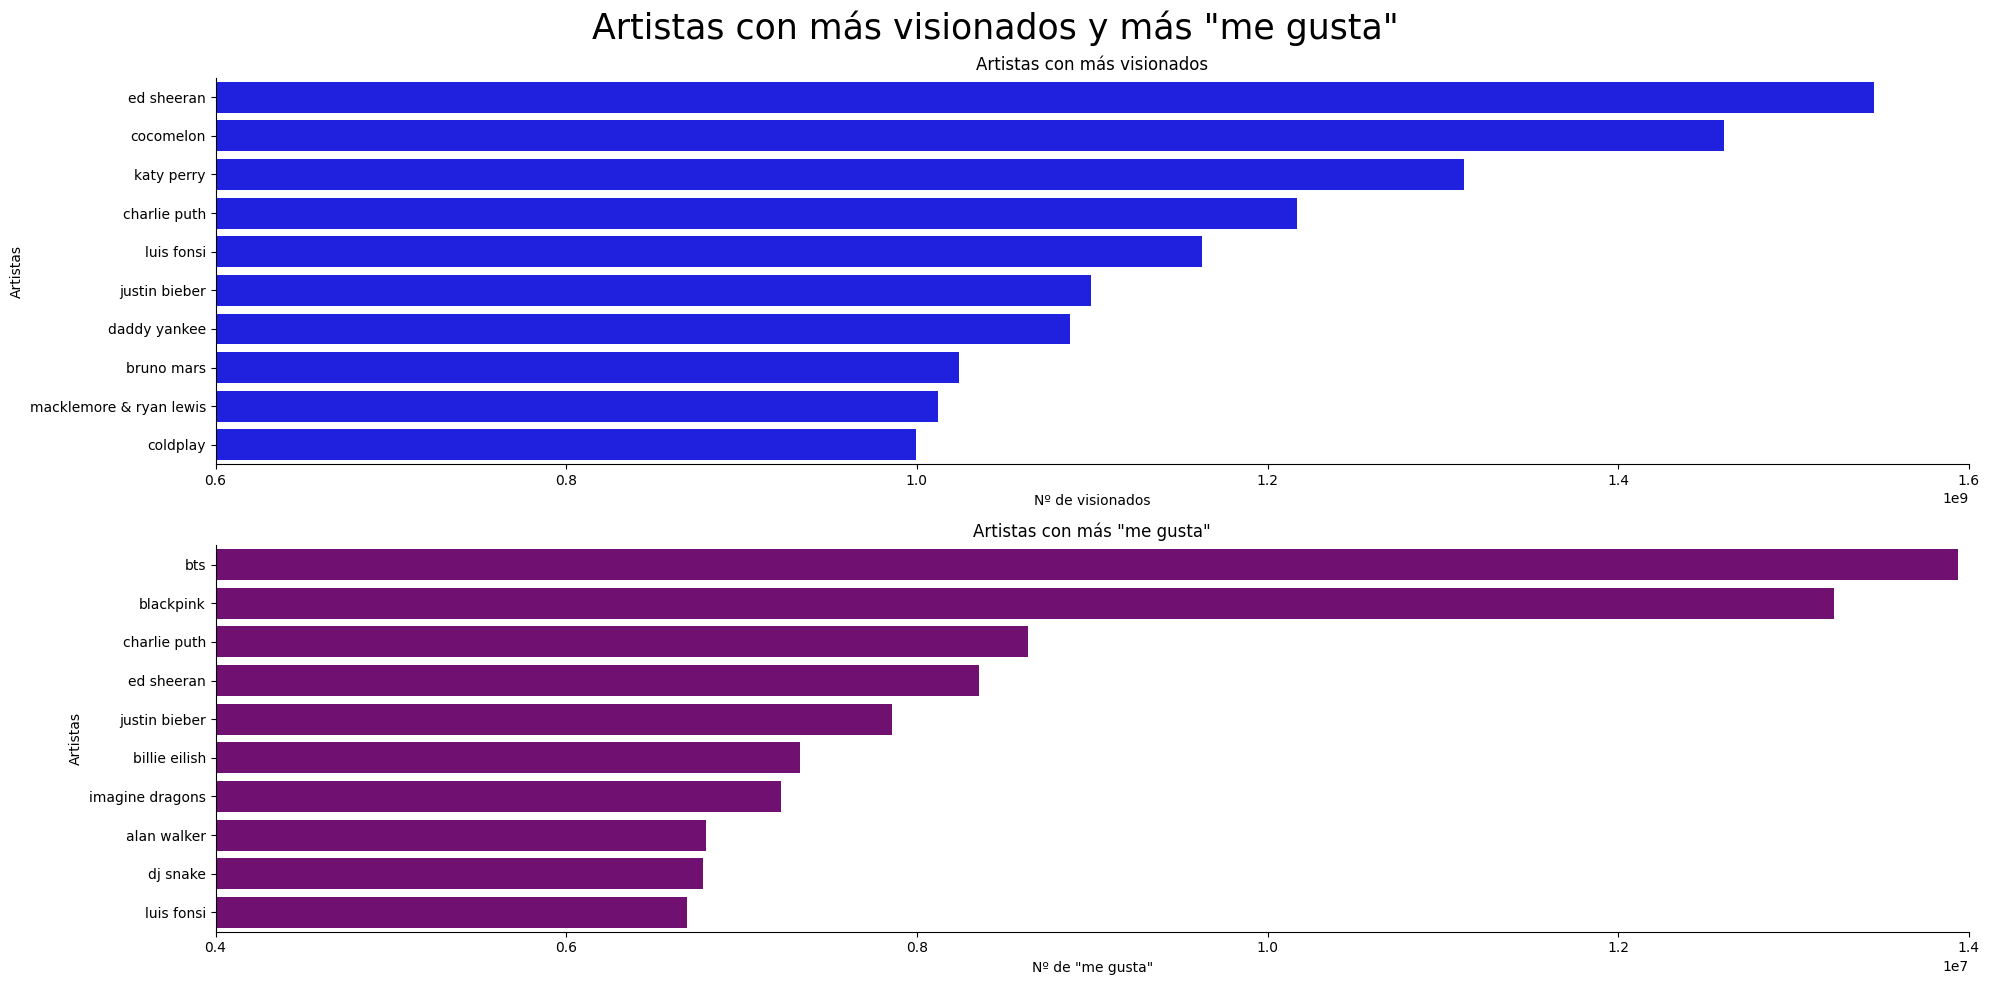

In [31]:
# lo vemos de forma gráfica
fig, axes = plt.subplots(2,1, figsize = (20, 10))

sns.barplot(x = df_10views['views'],
             y = df_10views['artist'],
             color = 'blue',
             ax = axes[0])

sns.barplot(x = df_10likes['likes'],
             y = df_10likes['artist'],
             color = 'purple',
             ax = axes[1])

axes[0].title.set_text('Artistas con más visionados')
axes[1].title.set_text('Artistas con más "me gusta"')

axes[0].set_xlabel('Nº de visionados')
axes[0].set_ylabel('Artistas')

axes[1].set_xlabel('Nº de "me gusta"')
axes[1].set_ylabel('Artistas') 

axes[0].set_xlim(0.6e9, 1.6e9)
axes[1].set_xlim(0.4e7, 1.4e7) 

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

fig.suptitle('Artistas con más visionados y más "me gusta"', fontsize = 25)

fig.tight_layout()

plt.show()

- **BONUS**: Haced lo mismo para los datos de tipo "single".

In [32]:
# filtramos el tipo 'single', agupamos por artista y calculamos la media de visitas y likes
df_views_likes_single = df2[df2['album_type'] == 'single'].groupby('artist')[['views', 'likes']].mean().reset_index()
df_views_likes_single.head()

,artist,views,likes
0,(g)i-dle,1.864349e+08,2.560939e+06
1,070 shake,1.326610e+07,2.577877e+05
2,11:11 music group,1.402559e+06,1.983644e+04
3,1nonly,8.792951e+06,1.653093e+05
4,2 chainz,1.699516e+07,2.204720e+05


In [33]:
# los 10 que más visitas han tenido de tipo 'single'
df_10views_single = df_views_likes_single.sort_values(by='views', ascending=False).head(10)
df_10views_single

,artist,views,likes
226,charlie puth,2.935089e+09,20873473.50
1041,rihanna,2.626030e+09,10603656.00
1004,psy,2.520605e+09,14396842.00
1266,twenty one pilots,1.987867e+09,15003359.00
1311,wiz khalifa,1.690387e+09,11947629.25
146,blackpink,1.465903e+09,16591806.00
196,calvin harris,1.371673e+09,6025032.50
279,daddy yankee,1.317749e+09,6632210.00
243,christina perri,1.107727e+09,6929093.00
781,macklemore & ryan lewis,1.012206e+09,6604141.00


In [34]:
# extraemos los artistas
arr10views_single = np.array(df_10views_single['artist'])
print(f'Los artistas que están en el top10 de más visionados de canciones de tipo single son: \n{arr10views_single}')

Los artistas que están en el top10 de más visionados de canciones de tipo single son: 
['charlie puth' 'rihanna' 'psy' 'twenty one pilots' 'wiz khalifa'
 'blackpink' 'calvin harris' 'daddy yankee' 'christina perri'
 'macklemore & ryan lewis']


In [35]:
# los 10 que más likes han tenido de tipo 'single'
df_10likes_single = df_views_likes_single.sort_values(by='likes', ascending=False).head(10)
df_10likes_single

,artist,views,likes
226,charlie puth,2.935089e+09,2.087347e+07
146,blackpink,1.465903e+09,1.659181e+07
1266,twenty one pilots,1.987867e+09,1.500336e+07
1004,psy,2.520605e+09,1.439684e+07
233,childish gambino,8.673776e+08,1.233227e+07
1311,wiz khalifa,1.690387e+09,1.194763e+07
542,j-hope,3.747844e+08,1.177462e+07
1041,rihanna,2.626030e+09,1.060366e+07
185,bts,2.306004e+08,7.514177e+06
116,bastille,5.261557e+08,7.028406e+06


In [36]:
# extraemos los artistas
arr10likes_single = np.array(df_10likes_single['artist'])
print(f'Los artistas que están en el top10 de más likes con canciones de tipo single son: \n{arr10likes_single}')

Los artistas que están en el top10 de más likes con canciones de tipo single son: 
['charlie puth' 'blackpink' 'twenty one pilots' 'psy' 'childish gambino'
 'wiz khalifa' 'j-hope' 'rihanna' 'bts' 'bastille']


In [37]:
# sacamos los comunes a ambas listas (los que están en el top10 de visitas y likes de tipo 'single')
arr_comunes_single = np.intersect1d(arr10views_single, arr10likes_single) 
print(f'Los artistas que están en el top10 de ambas listas con de canciones de tipo single son: \n{arr_comunes_single}')

Los artistas que están en el top10 de ambas listas con de canciones de tipo single son: 
['blackpink' 'charlie puth' 'psy' 'rihanna' 'twenty one pilots'
 'wiz khalifa']


In [38]:
print(f'El número de artistas con canciones de tipo single es: {df_views_likes_single.shape[0]}')

El número de artistas con canciones de tipo single es: 1355


- Tan solo 6 artistas están en ambas listas, por lo que no siempre los artistas con más visisionados son los que tienen más likes aunque sí hay una muy alta coincidencia si tenemos en cuenta que hay 1355 valores únicos en la columna 'artista' filtrando por tipo de album 'single'.

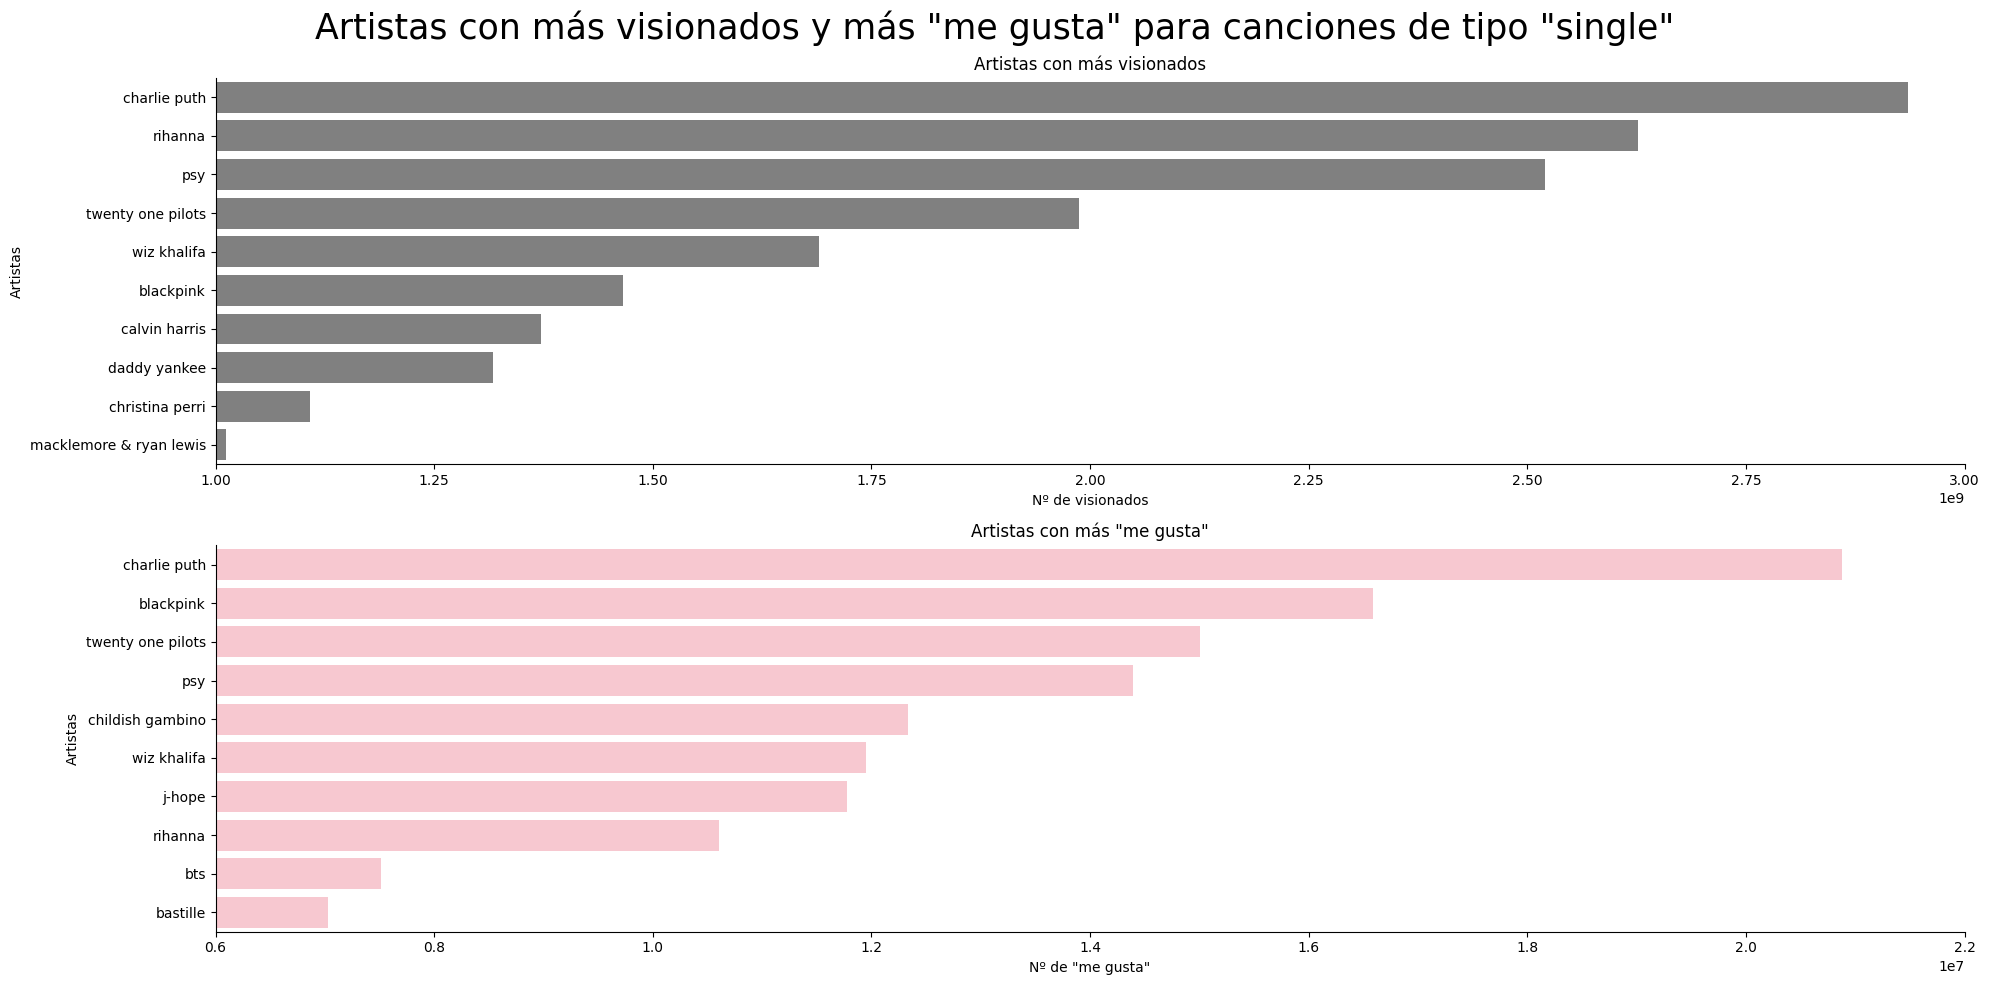

In [39]:
# lo vemos de forma gráfica
fig, axes = plt.subplots(2,1, figsize = (20, 10))

sns.barplot(x = df_10views_single['views'],
             y = df_10views_single['artist'],
             color = 'grey',
             ax = axes[0])

sns.barplot(x = df_10likes_single['likes'],
             y = df_10likes_single['artist'],
             color = 'pink',
             ax = axes[1])

axes[0].title.set_text('Artistas con más visionados')
axes[1].title.set_text('Artistas con más "me gusta"')

axes[0].set_xlabel('Nº de visionados')
axes[0].set_ylabel('Artistas')

axes[1].set_xlabel('Nº de "me gusta"')
axes[1].set_ylabel('Artistas') 

axes[0].set_xlim(1e9, 3e9)
axes[1].set_xlim(0.6e7, 2.2e7) 

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

fig.suptitle('Artistas con más visionados y más "me gusta" para canciones de tipo "single"', fontsize = 25)

fig.tight_layout()

plt.show()

- Ahora queremos analizar la colaboración entre artistas en la industria musical, se tienen datos de las colaboraciones realizadas en los últimos años. Se desea conocer cuáles son los artistas que han colaborado en mayor cantidad de canciones y generar un ranking con los diez primeros. ¿Qué artistas con los que más colaboraciones tienen? Para esto tendréis que:
    - Filtrad los datos para quedaros solo con aquellos datos donde en la columna "track" tengamos "feat".
    - Contad cuantas canciones tiene cada artista utilizando el dataframe generado en el paso anterior.
    - Mostrad los resultados en una gráfica, seleccionado los 10 artistas con más colaboraciones.
    - Deberéis contestar a las siguientes preguntas:
        - ¿Cuáles son los diez artistas que más han colaborado según los datos que tenemos?
        - ¿Cuál es el número de canciones en los que ha colaborado el artista que ocupa el primer lugar en el ranking?
        - ¿Cuál es el artista que ocupa el décimo lugar en el ranking y en cuántas canciones ha colaborado?

In [40]:
# dado que hay muchos registros y no queremos perdeer ninguno hacemos una pequeña exploración previa para ver ómo aparece 'feat':
lista_feat2 = [] # en una lista vacía para guardar las coincidencias con nuestro patrón
for cancion in df2['track']:
    if 'feat.' in cancion:
        canc = re.findall('.feat.', cancion) # buscamos 'feat' precedido y seguido de cualquier cosa para ver cómo aparece
        lista_feat2.append('_'.join(canc)) # unimos los resultados por si hubiera varias coincidencias en una misma canción
set_feat = set(lista_feat2) # eliminamos duplicados antes de revisar los resultados
set_feat 

{' feat.', ' featu_(feat.', '&feat.', '(feat.', '(feat._(feat.', '[feat.'}

In [41]:
# podemos deducir el patron que nos interesa de los resultados de la exploración
# creamos un nuevo dataframe filtrando con ese patrón
df_feat = df2[df2['track'].str.contains('.feat\.', case=False, regex=True)]
df_feat.sample()

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
16919,sam feldt,https://open.spotify.com/artist/20gsENnposVs2I...,way back home (feat. conor maynard) - sam feld...,way back home (feat. conor maynard) [sam feldt...,single,spotify:track:1ZLrDPgR7mvuTco3rQK8Pk,0.737,0.747,10.0,-4.818,0.0323,0.269,0.0,0.219,0.447,105.943,192453.0,https://www.youtube.com/watch?v=1kehqCLudyg,SHAUN feat. Conor Maynard - Way Back Home (Lyr...,WaveMusic,231410614.0,2252733.0,54689.0,🎧 Your Home For The Best Electronic Music With...,True,True,298937808.0


In [42]:
# para tener el listado completo ordenado en orden descendente de los artistas con más colaboraciones:
df_feat_artista = df_feat['artist'].value_counts().reset_index().sort_values(by='artist', ascending=False)
df_feat_artista.head()

,index,artist
0,macklemore,10
2,bibi und tina,10
1,juicy j,10
3,wu-tang clan,9
4,dj khaled,9


In [43]:
# A continuación el listado del top10 artistas con más colaboraciones
df_feat_10artista = df_feat_artista.head(10)
df_feat_10artista

,index,artist
0,macklemore,10
2,bibi und tina,10
1,juicy j,10
3,wu-tang clan,9
4,dj khaled,9
5,ty dolla sign,9
10,clean bandit,8
13,macklemore & ryan lewis,8
12,wale,8
11,thasup,8


In [44]:
print('A continuación se responden las preguntas planteadas:')
print('------------------------------------------------------')
print(f'Los diez artistas que más han colaborado según los datos que tenemos son: \n{df_feat_10artista["index"]}')

A continuación se responden las preguntas planteadas:
------------------------------------------------------
Los diez artistas que más han colaborado según los datos que tenemos son: 
0                  macklemore
2               bibi und tina
1                     juicy j
3                wu-tang clan
4                   dj khaled
5               ty dolla sign
10               clean bandit
13    macklemore & ryan lewis
12                       wale
11                     thasup
Name: index, dtype: object


In [45]:
print(f'''El artista que ocupa el primer lugar en el ranking es: {df_feat_10artista["index"][0]} y ha colaborado en {df_feat_10artista["artist"][0]} canciones.
Está empatado con  {df_feat_10artista["index"][1]} y  {df_feat_10artista["index"][2]}, ambos con {df_feat_10artista["artist"][2]} canciones.''')

El artista que ocupa el primer lugar en el ranking es: macklemore y ha colaborado en 10 canciones.
Está empatado con  juicy j y  bibi und tina, ambos con 10 canciones.


In [46]:
print(f'''El artista que ocupa el décimo lugar en el ranking es: {df_feat_10artista["index"][11]} y ha colaborado en {df_feat_10artista["artist"][11]} canciones.
Está empatado con {df_feat_10artista["index"][10]},  {df_feat_10artista["index"][13]} y  {df_feat_10artista["index"][12]}, todos con {df_feat_10artista["artist"][10]} canciones.''')

El artista que ocupa el décimo lugar en el ranking es: thasup y ha colaborado en 8 canciones.
Está empatado con clean bandit,  macklemore & ryan lewis y  wale, todos con 8 canciones.


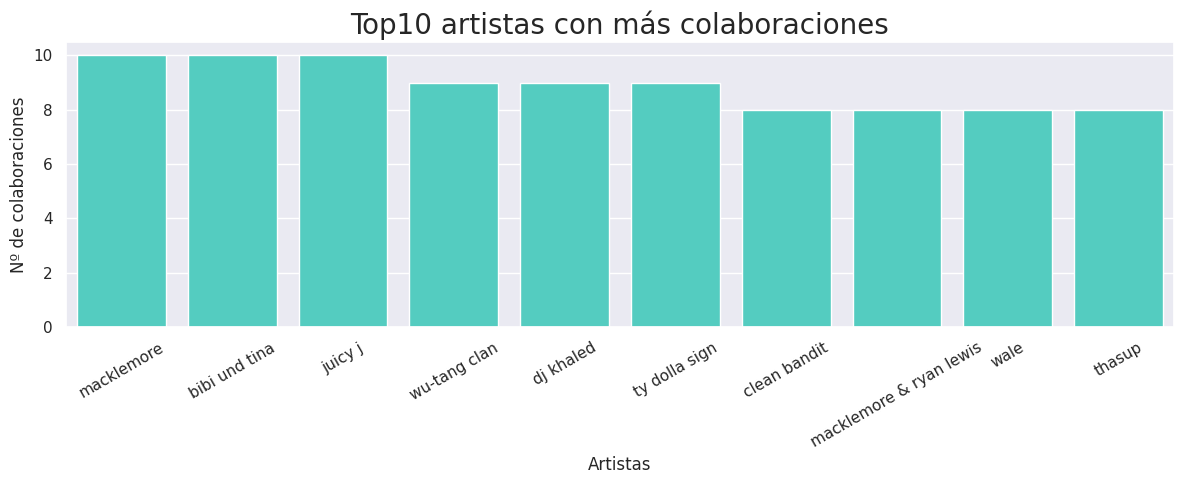

In [47]:
# mostramos gráficamente el top10 artistas con más colaboraciones
plt.figure(figsize = (12, 5))

sns.set(style='darkgrid') 

fig2 = sns.barplot(x = df_feat_10artista['index'],
             y = df_feat_10artista['artist'],
             color = 'turquoise')


fig2.set(xlabel='Artistas', ylabel='Nº de colaboraciones') 

plt.xticks(rotation=30)

fig2.set_title('Top10 artistas con más colaboraciones', fontsize = 20) 

plt.tight_layout()

plt.show()

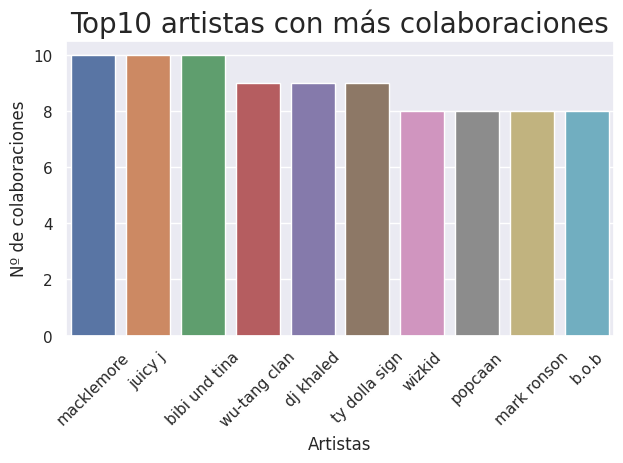

In [48]:
# Se podría haber obtenido también directamente con el gráfico siguiente:
# Aparecen nuevos artistas que no aparecieron antes porque tienen el mismo número de colaboraciones (8).
plt.figure()

sns.set(style='darkgrid') 

fig3 = sns.countplot(x='artist', data=df_feat, order=df_feat['artist'].value_counts().iloc[:10].index)

fig3.set(xlabel='Artistas', ylabel='Nº de colaboraciones') 

plt.xticks(rotation=45)

fig3.set_title('Top10 artistas con más colaboraciones', fontsize = 20) 

plt.tight_layout()

plt.show()

- Observacion: Aparecen nuevos artistas que no aparecieron en el filtrado anterior porque tienen el mismo número de colaboraciones (8). Con los datos obtenidos con el countplot el artista que ocupa el décimo lugar en el ranking es: b.o.b y ha colaborado en 8 canciones. El artista que ocupa el primer lugar en el ranking sigue siendo "macklemore", empatado con "juicy j" y "bibi und tina" con 10 canciones.  Podría ser interesante realizar el mismo proceso con más de 10 artistas para recoger todos los que tengan 8 colaboraciones. En el gráfico a continuación se puede ver que sería necesario sacar los 14 primeros.

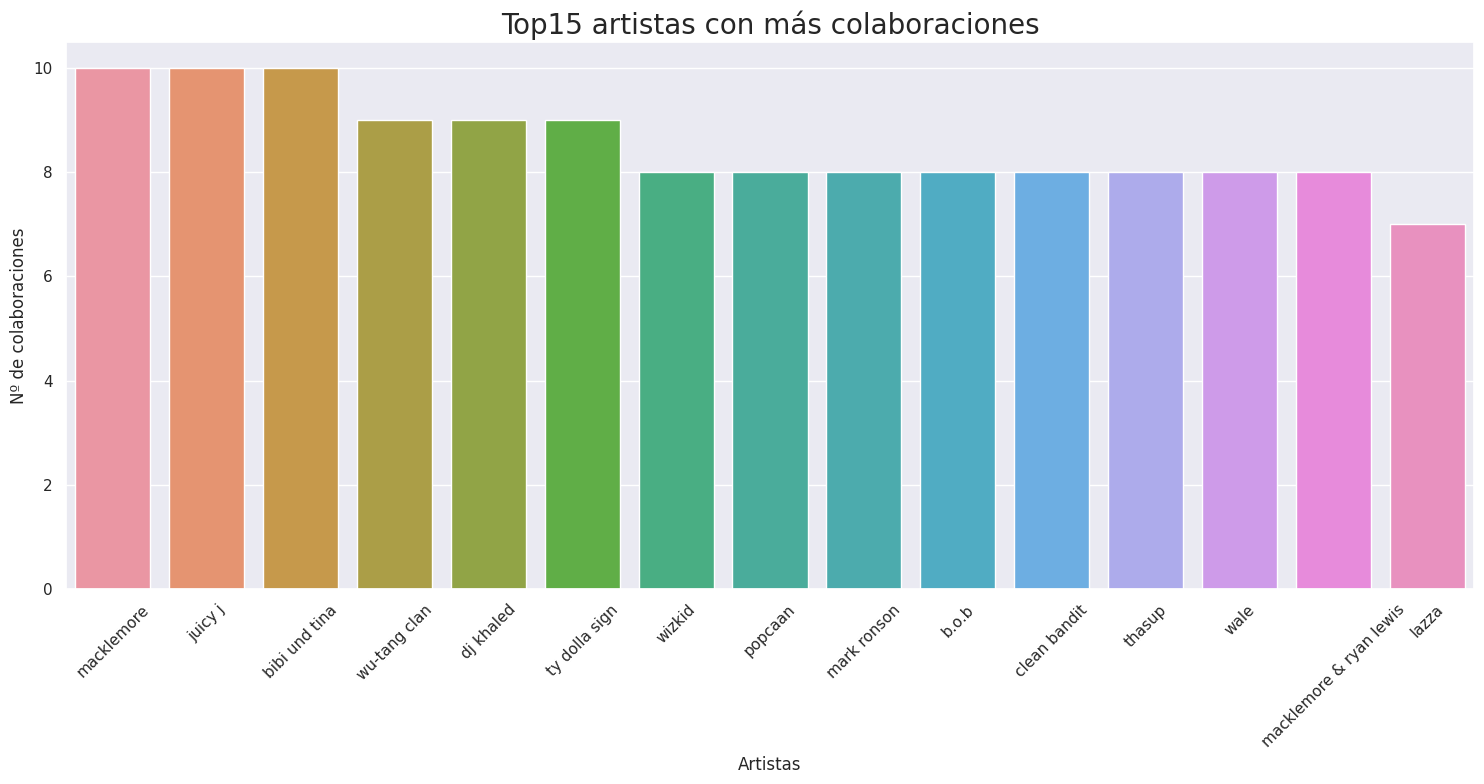

In [49]:
# si hacemos un nuevo gráfico con los primeros 15 artistas podemos ver que son necesarios 14 para tener incluidos todos los que tienen 8 colaboraciones
plt.figure(figsize = (15, 8))

sns.set(style='darkgrid') 

fig3 = sns.countplot(x='artist', data=df_feat, order=df_feat['artist'].value_counts().iloc[:15].index)

fig3.set(xlabel='Artistas', ylabel='Nº de colaboraciones') 

plt.xticks(rotation=45)

fig3.set_title('Top15 artistas con más colaboraciones', fontsize = 20) 

plt.tight_layout()

plt.show()

- Utilizando el dataframe original, queremos explorar si el tipo de álbum influye en la cantidad de vistas que recibe en una plataforma de transmisión de música. Para ello, debemos generar un boxplot con las variables necesarias y responder las siguientes preguntas:
    - ¿Qué tipo de álbumes tienden a tener más vistas en promedio?
    - ¿Hay algún tipo de álbumes que tenga una mayor dispersión en las vistas recibidas?
    - ¿Existen valores atípicos (outliers) en alguna categoría de álbumes?
    - ¿Qué conclusión se puede obtener sobre la relación entre el tipo de álbum y la cantidad de vistas recibidas?

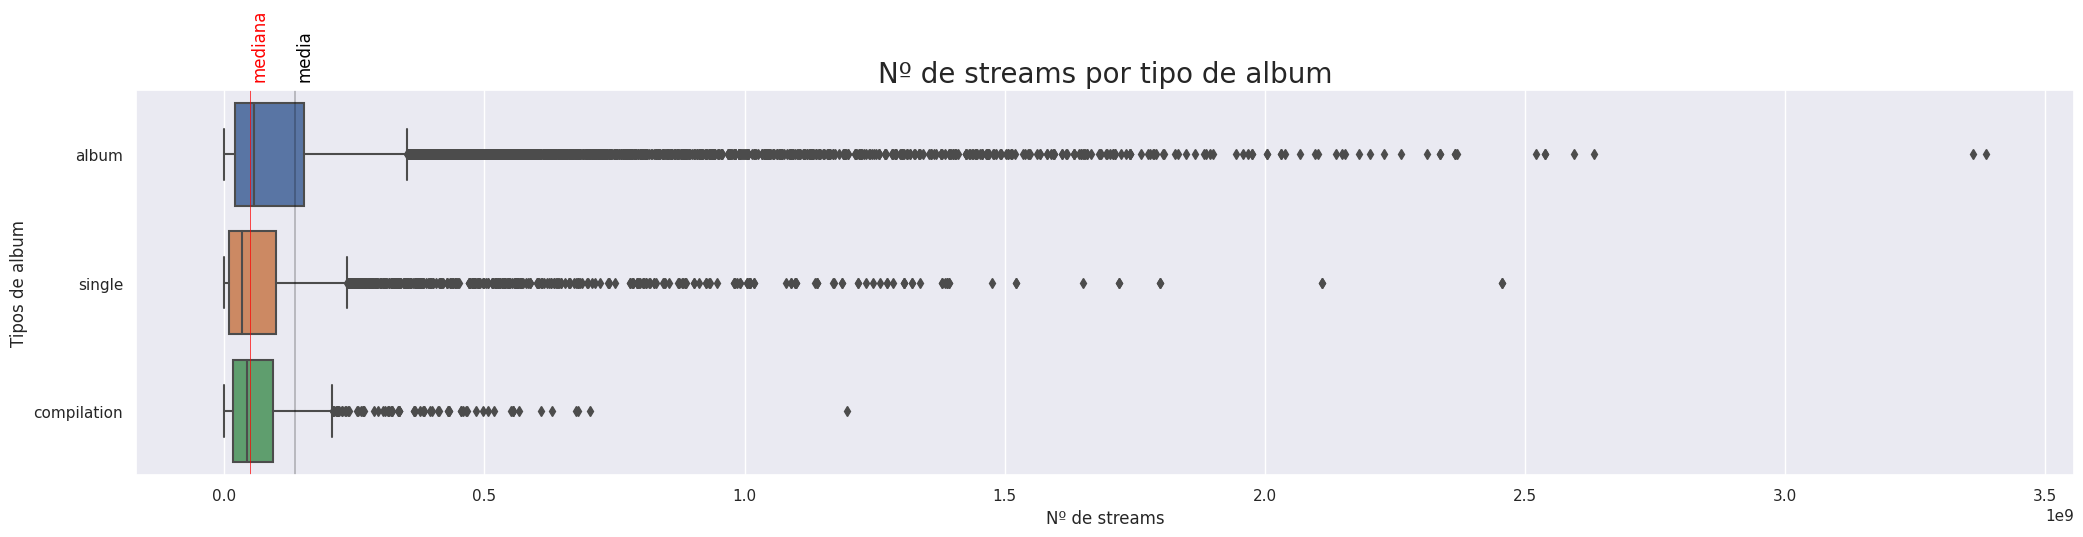

In [50]:
# como el enunciado habla de una plataforma de transmisión de música se entiende que se refiere a la columna 'stream' de spotify y no a la de 'views' de youtube
# dibujamos el gráfico con las variables solicitadas:
plt.figure(figsize = (25, 5))

sns.set(style='darkgrid') 

fig4 = sns.boxplot(x = df2['stream'], y = df2['album_type'])

fig4.set(xlabel='Nº de streams', ylabel='Tipos de album') 

fig4.set_title('Nº de streams por tipo de album', fontsize = 20) 

plt.axvline(df2['stream'].median(), color = 'red', linewidth = 0.5)
plt.text(df2['stream'].median(),-0.6,'mediana', color = 'red', rotation=90)

plt.axvline(df2['stream'].mean(), color = 'black', linewidth = 0.3)
plt.text(df2['stream'].mean(),-0.6,'media', color = 'black', rotation=90)

plt.show()

CONCLUSIONES:
- El valor de la media de cada tipo no aparece en el boxplot, tan solo la media global, y como se puede apreciar está muy distanciada de la mediana global, debido a la dispersión de los datos con numeroso outlier como se puede ver en el gráfico. Si siempre es más robusto el valor de la mediana que el de la media, porque se ve menos afectada por los valores atípicos, más en uncaso como este. Como se puede apreciar en el gráfico el tipo de album 'album' es el que tiene una mediana mayor de los tres tipos. También es el que tiene un rango intercuartílico más amplio, un límite superior del rango de valores típicos mayor, el que tiene un valor máximo mayor y parece tener más outliers o al menos más distanciados de los valores típicos.

- Rspondiendo directamente a las preguntas planteadas:
    - ¿Qué tipo de álbumes tienden a tener más vistas en promedio?   
      El de tipo 'album'.
    - ¿Hay algún tipo de álbumes que tenga una mayor dispersión en las vistas recibidas?
      El de tipo 'album'. La dispersión de los valores típicos de las otras dos categorías es similar pero esta destaca por tener valores más dispersos. Y en cuanto a los valores atípicos también tiene mayores valores y más dispersión.
    - ¿Existen valores atípicos (outliers) en alguna categoría de álbumes?
      Las tres categorías tienen outliers, con valores mucho más altos que los típicos. La categoría 'compilation' es la que tiene outliers menos distanciados de los valores típicos. La categoría 'album' es la que tiene outliers aún más alejados de los valores típicos que las otras dos categorías.
    - ¿Qué conclusión se puede obtener sobre la relación entre el tipo de álbum y la cantidad de vistas recibidas?
      No hay mucha diferencia entre los valores típicos de los tipos 'single' y 'compliation', siendo esta última la que tiende a tener menos vistas. La de tipo 'album' supera a las otras dos y se distancia más claramente. En cuanto a los valores atípicos sí hay ,más diferencia entre las tres categorías, siendo la 'compilation' la de menores valores y la de tipo 'album' de la valores más altos.
      